In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.metrics import accuracy_score, confusion_matrix

In [321]:
def sigmoid(x):
  """
  Sigmoid function for logistic regression
  """
  return 1 / (1 + np.exp(-x))


In [322]:

def hypothesis(X, weights, bias):
  """
  Hypothesis function for logistic regression
  """
  return sigmoid(np.dot(X, weights) + bias)


In [323]:
def cost_function(X, y, weights, bias, epsilon=1e-8):
  """
  Binary cross-entropy cost function with clipping to avoid division by zero
  """
  m = len(y)  # number of training examples
  predictions = hypothesis(X, weights, bias)
  predictions = np.clip(predictions, epsilon, 1 - epsilon)  # Clip between epsilon and 1-epsilon
  return -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))



In [324]:

def gradient_descent(X, y, weights, bias, learning_rate, iterations):
  """
  Gradient descent optimization for logistic regression
  """
  m = len(y)  # number of training examples
  cost_history = np.zeros(iterations)

  for iter in range(iterations):
    predictions = hypothesis(X, weights, bias)
    errors = predictions - y

    # Update weights and bias using gradients
    weights -= learning_rate * (1/m) * np.dot(X.T, errors)
    bias -= learning_rate * (1/m) * np.sum(errors)

    # Track cost function for monitoring convergence
    cost_history[iter] = cost_function(X, y, weights, bias)

  return weights, bias, cost_history


In [325]:
# Function to evaluate predictions (replace with your own evaluation metric)
def accuracy(y_true, y_predicted):
  """
  Calculate accuracy for binary classification
  """
  correct = np.sum(y_true == y_predicted)
  return (correct / len(y_true)) * 100


In [326]:
def plot_confusion_matrix(y_true, y_predicted):
    """
    Visualize the confusion matrix
    """
    confusion_matrix1 = confusion_matrix(y_true, y_predicted)
    plt.imshow(confusion_matrix1, cmap=plt.cm.Blues)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    # plt.xticks(np.arange(len(class_labels)), class_labels)
    # plt.yticks(np.arange(len(class_labels)), class_labels)
    plt.show()
    return confusion_matrix1

In [327]:
# Load the Iris flower dataset using sklearn
iris = load_iris()
features = iris.data
target = iris.target
# Access the class labels (target variable)
class_labels = iris.target_names

In [328]:
# Convert the target variable into numerical labels (optional but recommended for logistic regression)
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(target)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, target_encoded, test_size=0.3, random_state=42)

In [329]:
# Initialize weights and bias
weights = np.zeros(shape=(X_train.shape[1],))  # number of features
bias = 0

# Hyperparameters
learning_rate = 0.001
iterations = 2000


In [330]:
# Train the model using gradient descent
weights, bias, cost_history = gradient_descent(X_train, y_train, weights, bias, learning_rate, iterations)

print("Training completed!")


Training completed!


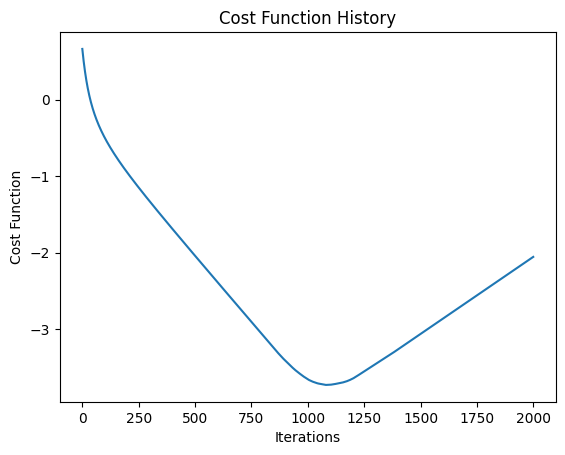

In [331]:
# Plot the cost function history
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function History")
plt.show()

In [332]:
# Make predictions on validation set
val_predictions = hypothesis(X_val, weights, bias)

# Evaluate model performance on validation set
validation_accuracy = accuracy(y_val, np.round(val_predictions))
print("Validation Accuracy:", validation_accuracy, "%")


Validation Accuracy: 28.888888888888886 %


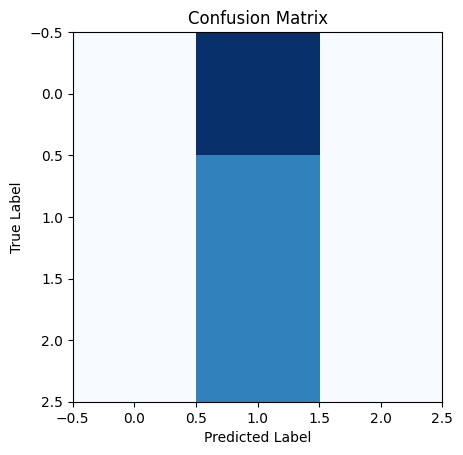

array([[ 0, 19,  0],
       [ 0, 13,  0],
       [ 0, 13,  0]])

In [333]:
confusion_matrix1 = plot_confusion_matrix(y_val, np.round(val_predictions))
confusion_matrix1

Validation Accuracy: 0.9555555555555556
[[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]


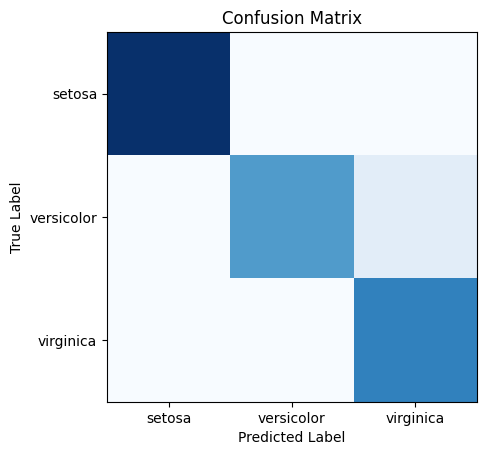

In [318]:
# Separate features (X) and target variable (y)
X = iris.data
y = iris.target

# Split data into training and validation sets (70% training, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Logistic Regression model with L2 regularization to avoid overfitting
model = LogisticRegression(multi_class='ovr', solver='lbfgs', C=1.0)  # Multi-class with L-BFGS solver and L2 regularization

# Train the model
model.fit(X_train, y_train)

# Make predictions on validation set
y_pred = model.predict(X_val)

# Calculate validation accuracy
validation_accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", validation_accuracy)

# Calculate confusion matrix
confusion_matrix = confusion_matrix(y_val, y_pred)
print(confusion_matrix)
# Get class labels from the dataset
class_labels = iris.target_names

# Visualize the confusion matrix
plt.imshow(confusion_matrix, cmap=plt.cm.Blues)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.yticks(np.arange(len(class_labels)), class_labels)
plt.show()